# Praktikum 2 PDL
---
Daya Sjahpoetro  
622022003

# Perceptron theory
The perceptron, like other linear models, uses a set of weights, one for each of the features, and to generate a prediction it computes the dot product of the weights and the feature values and adds a bias  
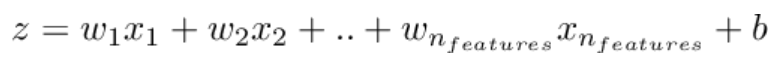  
The result of this linear function, that is also known as net input, is fed into an activation function f(z) that in the case of the perceptron is a simple step function, i.e. f(z) takes the value of 1 if z≥0 and 0 otherwise. The role of the activation function is to map the net input to two values, namely 0 and 1.

## Learning algorithm
The perceptron learning algorithm is a simple and fundamental algorithm used for binary classification tasks where you want to separate data points into two classes.  
Steps:
1. Start by initializing the weights and the bias. You can set these values to small random values.
2. For each training example, you feed the input data to the perceptron. The input consists of a vector of features (x1, x2, …, xn).
3. Cast a prediction with the current set of weights and bias terms.
4. Subtract the prediction from the target value to determine if we need to increase or decrease the individual weights and bias values.
5. Then, we increase or decrease (based on 4) the weight by learning rate for each input in the erroneously predicted training example.
6. Repeat steps 3 to 5 for all training examples for a fixed number of iterations (epochs)

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

class Perceptron:
    def __init__(self, learning_rate=0.1, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        self.weights = np.random.uniform(-1,1,X.shape[1])
        self.bias = np.random.uniform(-1,1)

        for _ in range(self.epochs):
            for inputs, target in zip(X, y):
                prediction = self.predict(inputs)
                error = target - prediction
                self.weights += self.learning_rate * error * inputs
                self.bias += self.learning_rate * error
    
    def predict(self, inputs):
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        return self._activation(weighted_sum)
    
    def _activation(self, z):
        return 1 if z >= 0 else -1

# setosa vs non-setosa menggunakan sepal length dan width

Test Accuracy: 100.00%


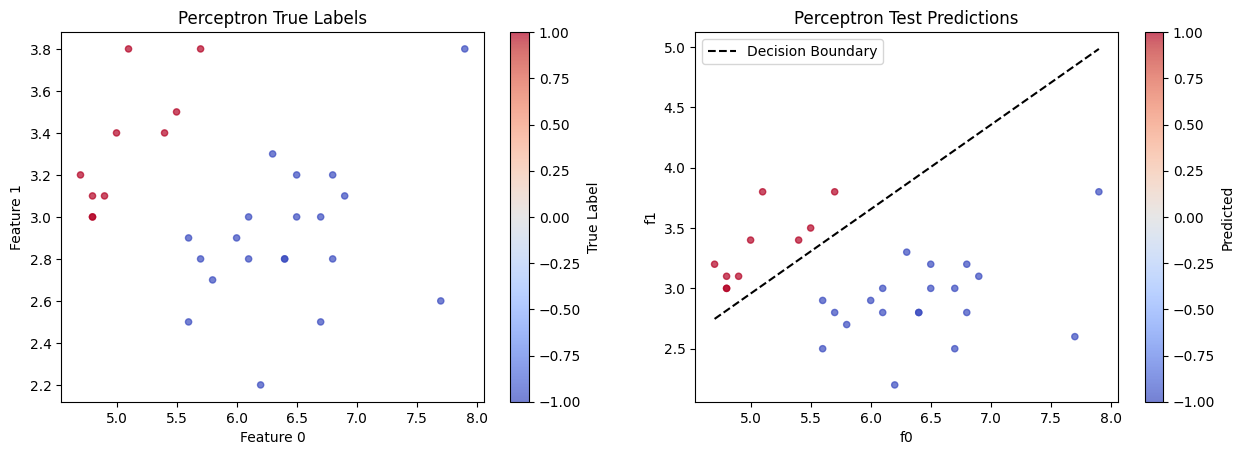

In [21]:
# Load data
df = pd.read_csv("iris-edit.csv",names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'],header=None)
# ax = df.plot.scatter(x='petal_length', y='petal_width', c="species", colormap="coolwarm", alpha=0.7)

# ambil data sepal length & sepal width
X = df.drop(columns=["species","petal_width","petal_length"]).values
y = df["species"].values
y_binary = np.where(y == 0, 1, -1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Train your Perceptron
model = Perceptron(learning_rate=0.01, epochs=100)
model.fit(X_train, y_train)

# Predict test set dan print akurasi
y_pred = np.array([model.predict(x) for x in X_test])
accuracy = np.mean(y_pred == y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Put into DataFrame for plotting
df_plot = pd.DataFrame(X_test, columns=[f"f{i}" for i in range(X.shape[1])])
df_plot["True Label"] = y_test
df_plot["Predicted"] = y_pred
# print(df_plot)

fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_figwidth(15)
# Plot using two features (f0 and f1) and color by prediction
ax = df_plot.plot.scatter(x="f0", y="f1", c="True Label", colormap="coolwarm", alpha=0.7, title="Perceptron True Labels",ax=axes[0])
ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")

# Get weights and bias
w = model.weights
b = model.bias

# Define decision boundary line
x_vals = np.linspace(df_plot["f0"].min(), df_plot["f0"].max(), 100)
# Avoid division by zero
if w[1] != 0:
    y_vals = -(w[0] / w[1]) * x_vals - (b / w[1])
    # Plot predictions with decision boundary
    ax = df_plot.plot.scatter(x="f0", y="f1", c="Predicted", colormap="coolwarm", alpha=0.7, title="Perceptron Test Predictions",ax=axes[1])
    ax.plot(x_vals, y_vals, color="black", linestyle="--", label="Decision Boundary")
    ax.legend()
else:
    print("Cannot plot decision boundary: w[1] is 0.")

# versicolor vs non versicolor menggunakan sepal length dan width 

Test Accuracy: 80.00%


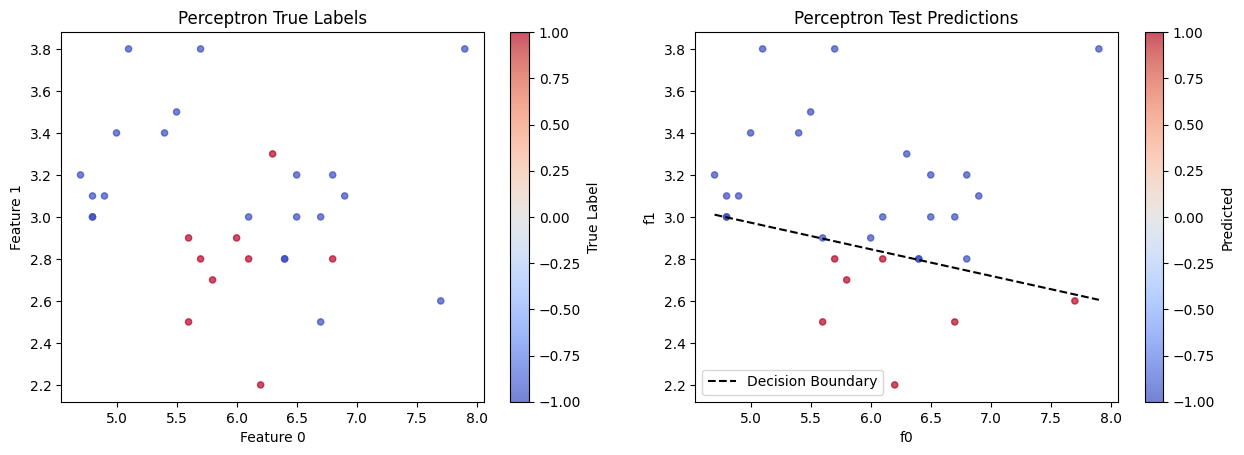

In [22]:
# Load data
df = pd.read_csv("iris-edit.csv",names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'],header=None)
# ax = df.plot.scatter(x='petal_length', y='petal_width', c="species", colormap="coolwarm", alpha=0.7)

# ambil data sepal length & sepal width
X = df.drop(columns=["species","petal_width","petal_length"]).values
y = df["species"].values
y_binary = np.where(y == 1, 1, -1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Train your Perceptron
model = Perceptron(learning_rate=0.001, epochs=10000)
model.fit(X_train, y_train)

# Predict test set dan print akurasi
y_pred = np.array([model.predict(x) for x in X_test])
accuracy = np.mean(y_pred == y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Put into DataFrame for plotting
df_plot = pd.DataFrame(X_test, columns=[f"f{i}" for i in range(X.shape[1])])
df_plot["True Label"] = y_test
df_plot["Predicted"] = y_pred
# print(df_plot)

fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_figwidth(15)
# Plot using two features (f0 and f1) and color by prediction
ax = df_plot.plot.scatter(x="f0", y="f1", c="True Label", colormap="coolwarm", alpha=0.7, title="Perceptron True Labels",ax=axes[0])
ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")

# Get weights and bias
w = model.weights
b = model.bias

# Define decision boundary line
x_vals = np.linspace(df_plot["f0"].min(), df_plot["f0"].max(), 100)
# Avoid division by zero
if w[1] != 0:
    y_vals = -(w[0] / w[1]) * x_vals - (b / w[1])
    # Plot predictions with decision boundary
    ax = df_plot.plot.scatter(x="f0", y="f1", c="Predicted", colormap="coolwarm", alpha=0.7, title="Perceptron Test Predictions",ax=axes[1])
    ax.plot(x_vals, y_vals, color="black", linestyle="--", label="Decision Boundary")
    ax.legend()
else:
    print("Cannot plot decision boundary: w[1] is 0.")

# Virginica vs non-virginica menggunakan sepal length dan width

Test Accuracy: 80.00%


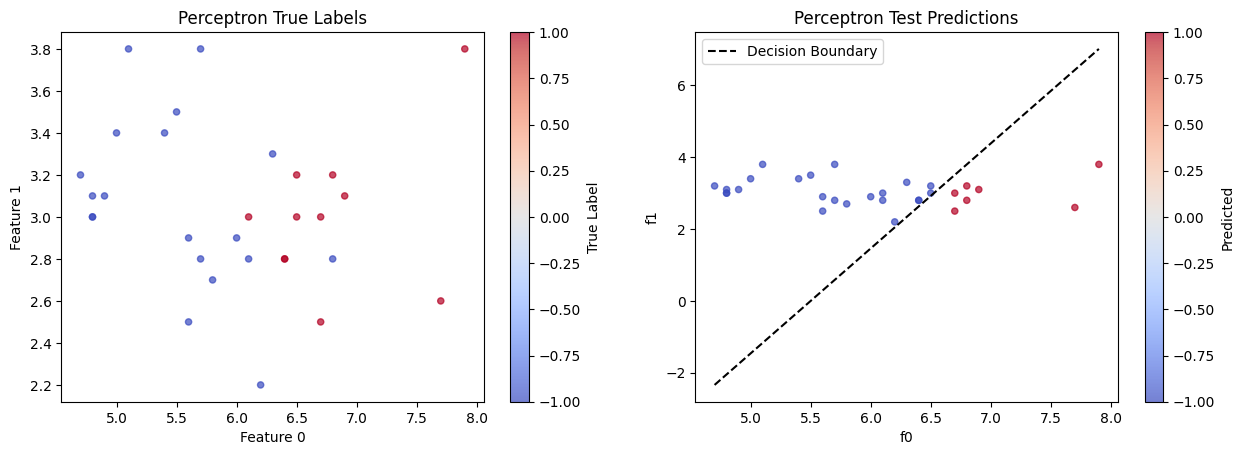

In [24]:
# Load data
df = pd.read_csv("iris-edit.csv",names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'],header=None)
# ax = df.plot.scatter(x='petal_length', y='petal_width', c="species", colormap="coolwarm", alpha=0.7)

# ambil data sepal length & sepal width
X = df.drop(columns=["species","petal_width","petal_length"]).values
y = df["species"].values
y_binary = np.where(y == 2, 1, -1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Train your Perceptron
model = Perceptron(learning_rate=0.001, epochs=10000)
model.fit(X_train, y_train)

# Predict test set dan print akurasi
y_pred = np.array([model.predict(x) for x in X_test])
accuracy = np.mean(y_pred == y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Put into DataFrame for plotting
df_plot = pd.DataFrame(X_test, columns=[f"f{i}" for i in range(X.shape[1])])
df_plot["True Label"] = y_test
df_plot["Predicted"] = y_pred
# print(df_plot)

fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_figwidth(15)
# Plot using two features (f0 and f1) and color by prediction
ax = df_plot.plot.scatter(x="f0", y="f1", c="True Label", colormap="coolwarm", alpha=0.7, title="Perceptron True Labels",ax=axes[0])
ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")

# Get weights and bias
w = model.weights
b = model.bias

# Define decision boundary line
x_vals = np.linspace(df_plot["f0"].min(), df_plot["f0"].max(), 100)
# Avoid division by zero
if w[1] != 0:
    y_vals = -(w[0] / w[1]) * x_vals - (b / w[1])
    # Plot predictions with decision boundary
    ax = df_plot.plot.scatter(x="f0", y="f1", c="Predicted", colormap="coolwarm", alpha=0.7, title="Perceptron Test Predictions",ax=axes[1])
    ax.plot(x_vals, y_vals, color="black", linestyle="--", label="Decision Boundary")
    ax.legend()
else:
    print("Cannot plot decision boundary: w[1] is 0.")

# setosa vs non-setosa menggunakan petal length dan width

Test Accuracy: 100.00%


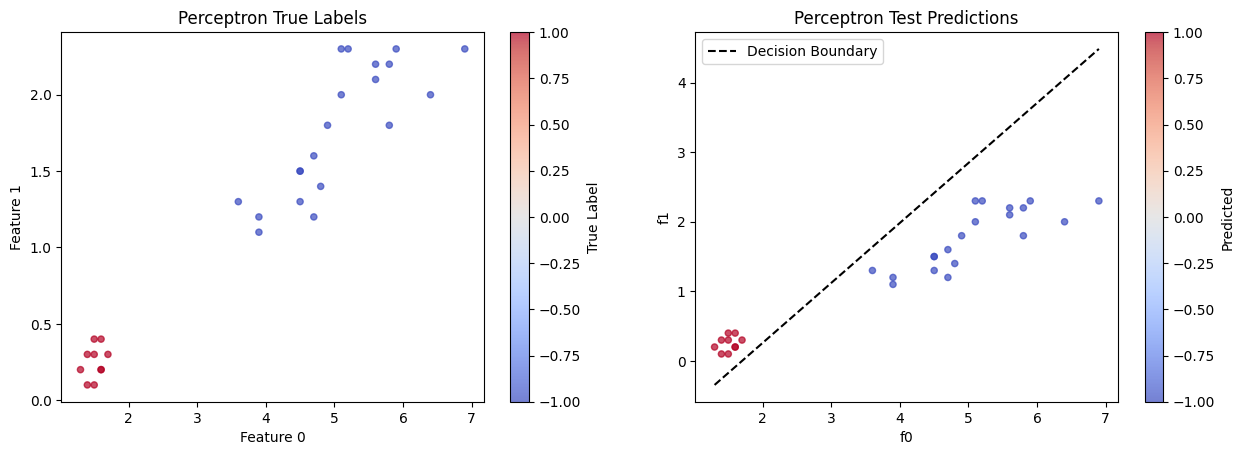

In [25]:
# Load data
df = pd.read_csv("iris-edit.csv",names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'],header=None)
# ax = df.plot.scatter(x='petal_length', y='petal_width', c="species", colormap="coolwarm", alpha=0.7)

# ambil data sepal length & sepal width
X = df.drop(columns=["species","sepal_width","sepal_length"]).values
y = df["species"].values
y_binary = np.where(y == 0, 1, -1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Train your Perceptron
model = Perceptron(learning_rate=0.01, epochs=100)
model.fit(X_train, y_train)

# Predict test set dan print akurasi
y_pred = np.array([model.predict(x) for x in X_test])
accuracy = np.mean(y_pred == y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Put into DataFrame for plotting
df_plot = pd.DataFrame(X_test, columns=[f"f{i}" for i in range(X.shape[1])])
df_plot["True Label"] = y_test
df_plot["Predicted"] = y_pred
# print(df_plot)

fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_figwidth(15)
# Plot using two features (f0 and f1) and color by prediction
ax = df_plot.plot.scatter(x="f0", y="f1", c="True Label", colormap="coolwarm", alpha=0.7, title="Perceptron True Labels",ax=axes[0])
ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")

# Get weights and bias
w = model.weights
b = model.bias

# Define decision boundary line
x_vals = np.linspace(df_plot["f0"].min(), df_plot["f0"].max(), 100)
# Avoid division by zero
if w[1] != 0:
    y_vals = -(w[0] / w[1]) * x_vals - (b / w[1])
    # Plot predictions with decision boundary
    ax = df_plot.plot.scatter(x="f0", y="f1", c="Predicted", colormap="coolwarm", alpha=0.7, title="Perceptron Test Predictions",ax=axes[1])
    ax.plot(x_vals, y_vals, color="black", linestyle="--", label="Decision Boundary")
    ax.legend()
else:
    print("Cannot plot decision boundary: w[1] is 0.")

# versicolor vs non versicolor menggunakan petal length dan width 

Test Accuracy: 70.00%


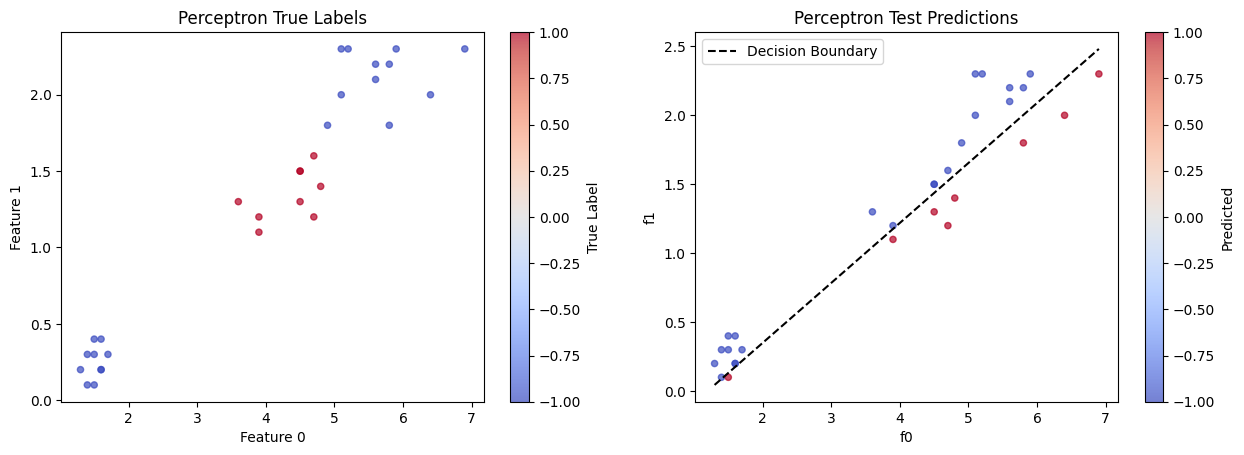

In [26]:
# Load data
df = pd.read_csv("iris-edit.csv",names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'],header=None)
# ax = df.plot.scatter(x='petal_length', y='petal_width', c="species", colormap="coolwarm", alpha=0.7)

# ambil data sepal length & sepal width
X = df.drop(columns=["species","sepal_width","sepal_length"]).values
y = df["species"].values
y_binary = np.where(y == 1, 1, -1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Train your Perceptron
model = Perceptron(learning_rate=0.001, epochs=10000)
model.fit(X_train, y_train)

# Predict test set dan print akurasi
y_pred = np.array([model.predict(x) for x in X_test])
accuracy = np.mean(y_pred == y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Put into DataFrame for plotting
df_plot = pd.DataFrame(X_test, columns=[f"f{i}" for i in range(X.shape[1])])
df_plot["True Label"] = y_test
df_plot["Predicted"] = y_pred
# print(df_plot)

fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_figwidth(15)
# Plot using two features (f0 and f1) and color by prediction
ax = df_plot.plot.scatter(x="f0", y="f1", c="True Label", colormap="coolwarm", alpha=0.7, title="Perceptron True Labels",ax=axes[0])
ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")

# Get weights and bias
w = model.weights
b = model.bias

# Define decision boundary line
x_vals = np.linspace(df_plot["f0"].min(), df_plot["f0"].max(), 100)
# Avoid division by zero
if w[1] != 0:
    y_vals = -(w[0] / w[1]) * x_vals - (b / w[1])
    # Plot predictions with decision boundary
    ax = df_plot.plot.scatter(x="f0", y="f1", c="Predicted", colormap="coolwarm", alpha=0.7, title="Perceptron Test Predictions",ax=axes[1])
    ax.plot(x_vals, y_vals, color="black", linestyle="--", label="Decision Boundary")
    ax.legend()
else:
    print("Cannot plot decision boundary: w[1] is 0.")

# Virginica vs non-virginica menggunakan petal width dan length

Test Accuracy: 96.67%


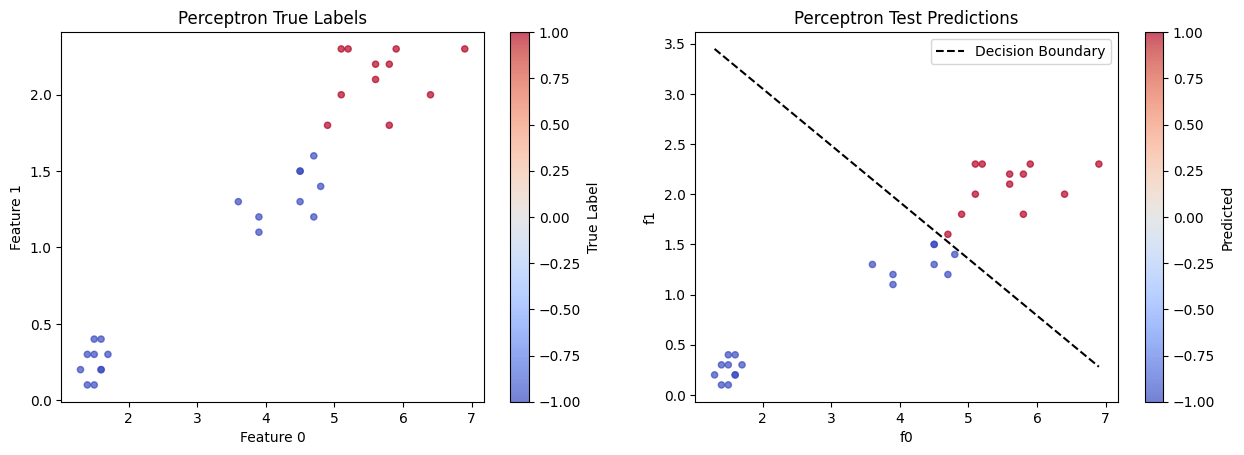

In [27]:
# Load data
df = pd.read_csv("iris-edit.csv",names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'],header=None)
# ax = df.plot.scatter(x='petal_length', y='petal_width', c="species", colormap="coolwarm", alpha=0.7)

# ambil data sepal length & sepal width
X = df.drop(columns=["species","sepal_width","sepal_length"]).values
y = df["species"].values
y_binary = np.where(y == 2, 1, -1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Train your Perceptron
model = Perceptron(learning_rate=0.001, epochs=1000)
model.fit(X_train, y_train)

# Predict test set dan print akurasi
y_pred = np.array([model.predict(x) for x in X_test])
accuracy = np.mean(y_pred == y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Put into DataFrame for plotting
df_plot = pd.DataFrame(X_test, columns=[f"f{i}" for i in range(X.shape[1])])
df_plot["True Label"] = y_test
df_plot["Predicted"] = y_pred
# print(df_plot)

fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_figwidth(15)
# Plot using two features (f0 and f1) and color by prediction
ax = df_plot.plot.scatter(x="f0", y="f1", c="True Label", colormap="coolwarm", alpha=0.7, title="Perceptron True Labels",ax=axes[0])
ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")

# Get weights and bias
w = model.weights
b = model.bias

# Define decision boundary line
x_vals = np.linspace(df_plot["f0"].min(), df_plot["f0"].max(), 100)
# Avoid division by zero
if w[1] != 0:
    y_vals = -(w[0] / w[1]) * x_vals - (b / w[1])
    # Plot predictions with decision boundary
    ax = df_plot.plot.scatter(x="f0", y="f1", c="Predicted", colormap="coolwarm", alpha=0.7, title="Perceptron Test Predictions",ax=axes[1])
    ax.plot(x_vals, y_vals, color="black", linestyle="--", label="Decision Boundary")
    ax.legend()
else:
    print("Cannot plot decision boundary: w[1] is 0.")

# Referensi
- https://medium.com/@robdelacruz/frank-rosenblatts-perceptron-19fcce9d627f
- https://medium.com/data-science/classification-with-rosenblatts-perceptron-e7f49e3af562